<a href="https://colab.research.google.com/github/NosenkoArtem/MADMO-advanced-/blob/master/%22dl_hw_2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torchvision import datasets, transforms

In [ ]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n %s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", np.dot(x, x.T))
print("mean over cols :\n%s" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s" % (np.cumsum(x, axis=0)))

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
[ 1.5  5.5  9.5 13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [ ]:
# pytorch world

x = np.arange(16).reshape(4, 4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print("X :\n%s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", torch.matmul(x, x.transpose(1, 0)))
print("mean over cols :\n", torch.mean(x, dim=-1))
print("cumsum of cols :\n", torch.cumsum(x, dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## NumPy vs Pytorch

Numpy и Pytorch не требуют описания статического графа вычислений. 

Можно отлаживаться с помощью pdb или просто print.

API несколько различается:

```
x.reshape([1,2,8]) -> x.view(1,2,8)
x.sum(axis=-1) -> x.sum(dim=-1)
x.astype('int64') -> x.type(torch.int64)
```


Легко конвертировать между собой:

```
torch.from_numpy(npx) -- вернет Tensor
tt.numpy() -- вернет Numpy Array
```

Преобразовать тензор из одного числа в обычное питоновское число:
```
torch.tensor([1]).item() -> 1
```


Если что:
- смотрите документацию https://pytorch.org/docs/
- гуглите (Stackoverflow/tutorials)

In [ ]:
x = torch.linspace(0, 2 * np.pi, 16, dtype=torch.float64)

#Mini-task: compute a vector of sin^2(x) + cos^2(x)
out = torch.sin(x)**2+torch.cos(x)**2

print(out.numpy())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Automatic gradients

У каждого тензора в Pytorch есть флаг `requires_grad`, который отвечает за автоматическое вычисление градиентов:

1. Создать переменную: `a = torch.tensor(..., requires_grad=True)`

2. Определить какую-нибудь дифференцируемую функцию `loss = whatever(a)`

3. Запросить обратный проход `loss.backward()`

4. Градиенты будут доступны в `a.grads`


Есть два важных отличия Pytorch от Theano/TF:

1. Функцию ошибки можно изменять динамически, например на каждом минибатче.

2. После вычисления `.backward()` градиенты сохраняются в `.grad` каждой задействованной переменной, при повторных вызовах градиенты суммируются. Это позволяет использовать несколько функций ошибок или виртуально увеличивать batch_size. Поэтому, после каждого шага оптимизатора градиенты стоит обнулять.



## Leaf vs Non-leaf Variable:
```
x = torch.tensor([1., 2., 3., 4.], requires_grad=True))  # leaf tensor
y = x + 1  # not a leaf variable
```

Градиенты будут сохранены и доступны для использования только для `leaf tensor`.
Такое поведение по-умолчанию сделано ради экономии памяти. Все тензоры с флагом `requires_grad = False` считаются`leaf tensors` по умолчанию.


Обратите внимание, что вычисление градиентов работает только для тензоров с вещественным типом данных:

In [ ]:
# will not work
x = torch.tensor([1, 2, 3, 4], requires_grad=True)

RuntimeError: ignored


Чтобы выставить флаг `requires_grad=False` и выключить автоматическое вычисление градиентов для нескольких тензоров, можно использовать `with torch.no_grad()` или `detach`:

In [ ]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    z = torch.exp(x)
    print(z.requires_grad)
    
# detach from the graph
w = torch.log(x).detach()
print(w.requires_grad)

True
True
False
False


Рассмотрим пример линейной регрессии на датасете Boston

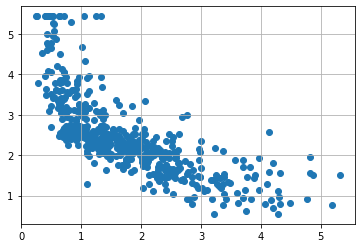

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

x, y = load_boston(return_X_y=True)

#select one column for simplicity. 
x = x[:, -1] / x[:, -1].std()
y = y / y.std()

plt.scatter(x, y)
plt.grid();

In [ ]:
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# все тензоры являются leaf-tensors
# x и y не требуют вычисления градиентов
for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

True True
True True
True False
True False


In [ ]:
#try out gradients
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

loss.backward()

#now w.grad is a tensor containing gradient of L w.r.t. w

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

# no gradients for tensors with requires_grad=False
# and non-leaf tensors
print("Non-Leaf x dL/dx = \n", x.grad)
print("Non-Leaf loss dL/dpred = \n", y_pred.grad)

dL/dw = 
 tensor([-7.2240])
dL/db = 
 tensor([-4.9048])
Non-Leaf x dL/dx = 
 None
Non-Leaf loss dL/dpred = 
 None


/usr/local/lib/python3.6/dist-packages/torch/tensor.py:746: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  warnings.warn("The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad "


## Градиенты промежуточных вершин

В графе, который мы описали `x` и `y_pread` не являются листовыми вершинами. По умолчанию для них не сохраняются градиенты.

Для промежуточных вершин мы можем запросить сохранение градиентов с помощью функции `.retain_grad()`.


In [ ]:
y_pred = w * x + b

# check this:
y_pred.retain_grad()

loss = torch.mean((y_pred - y)**2)
loss.backward()

print("Non-Leaf loss dL/dpred = \n", y_pred.grad[:10])

Non-Leaf loss dL/dpred = 
 tensor([-0.0103, -0.0093, -0.0149, -0.0144, -0.0156, -0.0123, -0.0099, -0.0117,
        -0.0071, -0.0081])


# Линейная регрессия

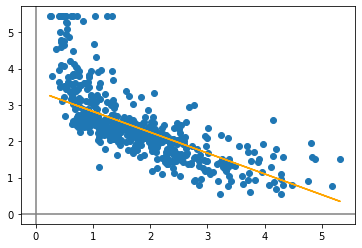

loss =  0.4884285628795624
Done!


In [ ]:
from IPython.display import clear_output
alpha = 0.1
x, y = load_boston(return_X_y=True)
x = x[:, -1] / x[:, -1].std()
y = y / y.std()

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
for i in range(200):
    
    #compute loss
    y_pred = w * x  + b
    loss = torch.mean((y_pred - y)**2)
    
    # backprop
    loss.backward()
    # gradient descent step for weights
    # take alpha about 0.1
    with torch.no_grad():
      w.sub_(alpha*w.grad)
      b.sub_(alpha*b.grad)
      #zero gradients
      w.grad.zero_()
      b.grad.zero_()
    # w.requires_grad = True
    # b.requires_grad = True
    
    #the rest of code is just bells and whistles
    if (i + 1) % 5==0:
        #draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(),y.numpy())
        plt.plot(x.numpy(),y_pred.data.numpy(),color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

# Optimizers

В этом примере мы пользовались простым правилом для градиентного спуска:
  
$$\theta^{n+1} = \theta^{n} - \alpha \nabla_{\theta}L$$


Единственным параметром в нем является $\alpha$ -- это `learning_rate`.

На практике часто используют различные модификации (например _Momentum_):

$$\theta^{n+1} = \theta^{n} - U^{n}\\
U^{n} = \gamma U^{n-1} + \alpha \nabla_{\theta}(L)
$$

Хороший обзор алгоритмов оптимизации для сетей можно посмотреть [тут](http://ruder.io/optimizing-gradient-descent/).



Pytorch предоставляет практически все широкораспространненные оптимизаторы:    
http://pytorch.org/docs/master/optim.html




Оптимизаторы удобны в использовании:

- требуется указать список переменных для оптимизации
- `opt.step()` применяет `update` ($U^{n}$) к весам
- `opt.zero_grad()` сбрасывает градиенты





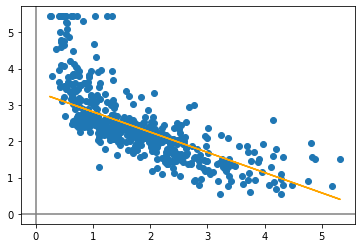

loss =  0.49351754784584045
Done!


In [ ]:
# get data
x, y = load_boston(return_X_y=True)
x = x[:, -1] / x[:, -1].std()
y = y / y.std()

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# define optimizer
opt = torch.optim.RMSprop([w, b], lr=0.1)

for i in range(200):
  y_pred = w * x  + b
  # compute loss
  loss = torch.nn.MSELoss()
  loss_values = loss(y_pred, y)
  # backprop and gradient descent
  loss_values.backward()
  opt.step()
  opt.zero_grad()
    
    #the rest of code is just bells and whistles
  if (i + 1) % 5 == 0:
        #draw linear regression prediction vs data
      clear_output(True)
      plt.axhline(0, color='gray')
      plt.axvline(0, color='gray')
      plt.scatter(x.numpy(), y.numpy())
      plt.plot(x.numpy(), y_pred.data.numpy(), color='orange')
      plt.show()

      print("loss = ", loss_values.item())
      if loss_values.item() < 0.5:
          print("Done!")
          break

## Highlevel-API 

При работе с нейронными сетями становится неудобно контролировать переменные с весами по-отдельности. Pytorch предоставляет высокоуровневый API для моделей http://pytorch.org/docs/master/nn.html#torch.nn.Module.


Чтобы воспользоваться моделью необходимо отнаследоваться от torch.nn.Module, определить слои и описать `forward`, `backward` будет вычислен автоматически.


Для демонстрации снова воспользуемся MNIST'ом.

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...



Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


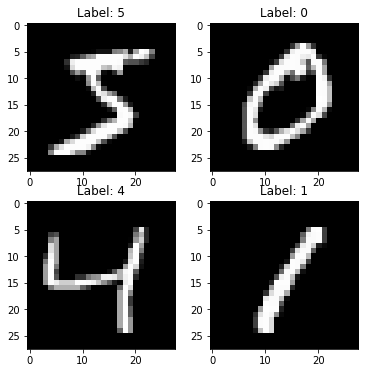

In [ ]:
from torchvision.datasets import  MNIST
X_train, y_train = MNIST(root='./data', train=True, download=True, transform=None).data, MNIST(root='./data', train=True, download=True, transform=None).targets
X_test, y_test = MNIST(root='./data', train=False, download=True, transform=None).data, MNIST(root='./data', train=False, download=True, transform=None).targets

plt.figure(figsize=[6, 6])
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title("Label: %i" % y_train[i])
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray');

In [ ]:
# Higher-level API:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, hidden_size=10):
        super(Net, self).__init__()
        self.hidden_size = hidden_size
        # here you construct weights for linear layers 
        self.fc1 = torch.nn.Linear(in_features=28*28, out_features=self.hidden_size)
        self.fc2 =  torch.nn.Linear(in_features=self.hidden_size, out_features=self.hidden_size)
        self.fc3 = torch.nn.Linear(in_features=self.hidden_size, out_features=10)
        
    def forward(self, x):
        # here you describe usage of layers
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # check log_softmax signature
        return F.log_softmax(x, dim=-1)
    # backward function computes automaticaly

In [ ]:
# model interface:
model = Net()
tt = X_train[:10, :].type_as(torch.FloatTensor())
output = model(tt)

print('Model outputs: \n', output)
# TODO: получите вероятности из output c помощью функций из torch
# hint: см документацию к log_softmax
probs = output.exp()
print('Probs: \n', probs)

# TODO: получите предсказание из output c помощью функций из torch
pred = probs.argmax(-1)
print('Pred: \n', pred.data.numpy())
print('Truth: \n', y_train[:10])

Model outputs: 
 tensor([[-1.1839e+01, -1.7438e+01, -1.5446e+01, -1.2630e+01, -8.1327e+00,
         -1.0564e+01, -1.1239e+01, -1.2616e+01, -3.4779e-04, -1.3934e+01],
        [-8.7611e+00, -2.1127e+01, -1.2754e+01, -1.3321e+01, -5.6451e+00,
         -1.7402e+01, -9.1792e+00, -1.3234e+01, -3.8250e-03, -1.1002e+01],
        [-3.4449e+00, -2.9487e+00, -5.8150e+00, -3.6435e+00, -8.5461e-01,
         -1.3856e+00, -3.1475e+00, -4.2760e+00, -1.9614e+00, -4.3127e+00],
        [-6.8437e+00, -1.1147e+01, -1.2344e+01, -6.3277e+00, -4.7442e+00,
         -8.1082e+00, -7.7486e+00, -1.0416e+01, -1.2496e-02, -9.3961e+00],
        [-8.8973e+00, -1.4552e+01, -1.2605e+01, -9.5490e+00, -1.3726e-02,
         -8.3790e+00, -9.3641e+00, -1.1953e+01, -4.3412e+00, -9.4613e+00],
        [-1.0815e+01, -2.0809e+01, -1.4485e+01, -1.4005e+01, -7.6399e+00,
         -1.5898e+01, -1.0624e+01, -1.3988e+01, -5.2998e-04, -1.3008e+01],
        [-2.1355e+00, -3.4597e+00, -2.3588e+00, -3.9975e+00, -2.6526e+00,
         -3.781

Тренировка сети

Для тренировки сети нам требуется 
- итератор по данным
- функция тренировки (прогон по данным, вычисление и применение градиентов)
- функция валидации (прогон по тестовым данным, вычисление метрик)

In [ ]:
from IPython.display import clear_output
from tqdm import trange

# функция для итераций по минибатчам, из первого семинара
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [ ]:
def train(model, optimizer, batchsize=32):
    loss_log = []
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # data preparation
      
      data = x_batch.type_as(torch.FloatTensor())
      target = y_batch

      optimizer.zero_grad()
      output = model(data)
      
      loss = F.nll_loss(output, target)
        # compute gradients
      loss.backward()
        # make a step
      optimizer.step()
      loss = loss.item()/len(x_batch)
      loss_log.append(loss)
    return loss_log


# TODO: написать функцию для валидации по X_val, y_val
# hint: optimizer не нужен
def test(model, X_test, y_test):
    loss_log = []
    model.eval()
    X_test = X_test.type_as(torch.FloatTensor())
    data, target = X_test, y_test
    data = data.view(-1, 28*28)

    output = model(data)
    loss_log = F.nll_loss(output, target).item()/len(X_test)                                                
    
    return loss_log

Для отслеживания процедуры тренировки построить график

In [ ]:
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.plot(train_history, label='train')
    plt.plot(val_history, label='test')
    plt.legend()
    plt.grid()
    plt.show()

100%|██████████| 18/18 [00:00<00:00, 88.64it/s]


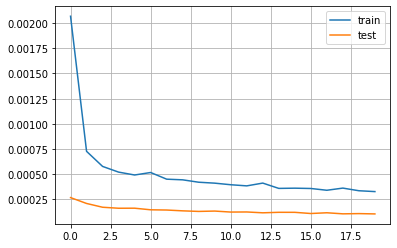

In [ ]:
train_log = []
val_log = []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 3200

train_loss, val_loss = [], []
for epoch in range(20):
  train_loss.append(np.mean(train(model, opt, batchsize=batchsize)))
  val_loss.append(test(model, X_test, y_test))
        
    # TODO: график train_loss vs train_steps с точками val_loss vs trained_steps
    # use your plot_history()
    
    # hint: train_log and val_log may contain data with different shapes
plot_history(train_loss, val_loss)    

## Метрики

Logloss -- величина, которую трудно интерпретировать. 
Для отслеживания тренировки и сравнения моделей удобнее наблюдать за интерпретируемыми метриками, например точностью (accuracy)

Модифицируйте код train/test функций так, чтобы помимо ошибки подсчитывалась точность за батч:

100%|██████████| 18/18 [00:00<00:00, 79.83it/s]


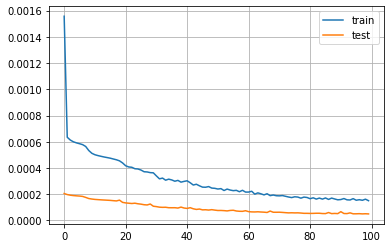

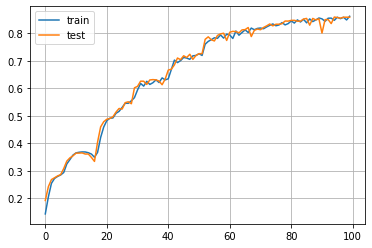

In [ ]:
# TODO: добавьте подсчет точности
def train(model, optimizer, batchsize=32):
    loss_log, acc_log = [], []
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # data preparation
      
      data = x_batch.type_as(torch.FloatTensor())
      target = y_batch

      optimizer.zero_grad()
      output = model(data)
      
      loss = F.nll_loss(output, target)
        # compute gradients
      loss.backward()
        # make a step
      optimizer.step()
      loss = loss.item()/len(x_batch)
      loss_log.append(loss)

      acc = (output.argmax(dim=1) == y_batch).float().mean()
      acc_log.append(acc)
    return loss_log, acc_log


# TODO: добавьте подсчет точности:
def test(model, X_test, y_test):
    loss_log, acc_log = [], [] 
    model.eval()
    X_test = X_test.type_as(torch.FloatTensor())
    data, target = X_test, y_test
    data = data.view(-1, 28*28)

    output = model(data)
    loss_log = F.nll_loss(output, target).item()/len(X_test)                                                
    acc_log = (output.argmax(dim=1) == y_test).float().mean()
    return loss_log, acc_log


train_log, train_acc_log = [], []
val_log, val_acc_log = [], []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 3200

train_loss, val_loss = [], []
train_acc, val_acc = [], []
for epoch in range(100):
  train_loss_i, train_acc_i = train(model, opt, batchsize=batchsize)
  train_loss.append(np.mean(train_loss_i))
  train_acc.append(np.mean(train_acc_i))

  val_loss_i, val_acc_i = test(model, X_test, y_test)
  val_loss.append(val_loss_i)
  val_acc.append(val_acc_i)

plot_history(train_loss, val_loss, title='Loss')
plot_history(train_acc, val_acc, title='Accuracy')

## Fine Tuning
Для многих прикладных задач не существует больших датасетов с хорошей разметкой. 
Поэтому распространенным приемом является тренировка на похожем, но большом датасете и доучивание сети на целевом.

Такой прием называют **Transfer Learning** или **Finetuning**.

В сверточных сетях для классификации выделяют две части:
- тело сети -- это набор сверток и пулингов (convolutions and poolings)
- голову -- это MLP (набор полносвязных слоев) после которых делается softmax и получаются вероятности разных классов.


Вычислительно простым вариантом finetuning является переучивание головы сети.


Нам потребуется [предобученная модель](http://pytorch.org/docs/master/torchvision/datasets.html#torchvision-datasets) и датасет для нашей задачи.

Предлагется воспользоваться моделью для ImageNet и датасетом  https://download.pytorch.org/tutorial/hymenoptera_data.zip


В датасете содержатся картинки двух классов (`ants` и `bees`) разных размеров.

In [ ]:
! wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
! unzip ./hymenoptera_data.zip

--2020-07-17 09:52:10--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 52.84.16.5, 52.84.16.69, 52.84.16.104, ...
Connecting to download.pytorch.org (download.pytorch.org)|52.84.16.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   172MB/s    in 0.3s    

2020-07-17 09:52:10 (172 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]

Archive:  ./hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/

Загрузчик данных -- одна из важных компонент для эффективного обучения нейронных сетей:
асинхронная загрузка и быстрая предобработка важны для полного использования GPU.

Для курсовых проектов рекомендуется ознакомиться и использовать [Pytorch Dataset](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#dataset-class)

Пример использования:

In [ ]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os


data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()
plt.ion()

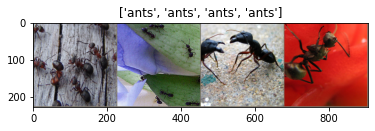

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.1)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
# обратите внимание на сохранение лучшей версии весов сети
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data

                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.item()
                running_corrects += torch.sum(preds == labels).type(torch.float)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
        
        time_elapsed = time.time() - since
        print('Elapsed {:.0f}m {:.0f}s\n'.format(time_elapsed // 60, time_elapsed % 60))

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
# torchvision содержит ряд моделей с претрейненными весами:
[m for m in dir(models) if not m.startswith('_')]

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

In [ ]:
model_ft = models.resnet18(pretrained=True)
# hint: вы можете изучить устройство любого объекта в python пользуясь интерактивностью интерпретатора и методом dir()

# Список слоев модели можно получить с помощью обхода
# for x in model_ft.named_modules():
#    print(x[0], x[1])

# TODO: подмените в модели последний слой, чтобы она работала для двух классов

# TODO: выберите, какие параметры дообучать. Результат получается лучше если дообучать всё или только последний слой? Почему?
# например, выключить обучение всех параметров можно при помощи этого кода:
# for params in model_ft.parameters():
#     params.requires_grad = False

for name, child in model_ft.named_children():
   if name in ['fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False

model_ft.fc = nn.Linear(512, 2)
params_to_train = model_ft.parameters()

# use GPU if you have it
if use_gpu:
    model_ft = model_ft.cuda()

# loss
criterion = nn.CrossEntropyLoss()

# Create optimizer on the selected parameters
optimizer_ft = optim.SGD(params_to_train, lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



conv1 is frozen
bn1 is frozen
relu is frozen
maxpool is frozen
layer1 is frozen
layer2 is frozen
layer3 is frozen
layer4 is frozen
avgpool is frozen
fc is unfrozen


In [ ]:
model_ft = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)
# если всё сделано правильно, то точность на валидации должна быть больше 94%

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.1605 Acc: 0.6434
val Loss: 0.0455 Acc: 0.9346
Elapsed 0m 4s

Epoch 1/24
----------
train Loss: 0.1628 Acc: 0.6926
val Loss: 0.0577 Acc: 0.9216
Elapsed 0m 8s

Epoch 2/24
----------
train Loss: 0.1455 Acc: 0.7500
val Loss: 0.0692 Acc: 0.8758
Elapsed 0m 12s

Epoch 3/24
----------
train Loss: 0.1187 Acc: 0.7828
val Loss: 0.0411 Acc: 0.9477
Elapsed 0m 16s

Epoch 4/24
----------
train Loss: 0.1188 Acc: 0.7992
val Loss: 0.0534 Acc: 0.9216
Elapsed 0m 20s

Epoch 5/24
----------
train Loss: 0.1209 Acc: 0.7787
val Loss: 0.0497 Acc: 0.9542
Elapsed 0m 24s

Epoch 6/24
----------
train Loss: 0.1046 Acc: 0.8238
val Loss: 0.0435 Acc: 0.9412
Elapsed 0m 28s

Epoch 7/24
----------
train Loss: 0.0706 Acc: 0.8934
val Loss: 0.0478 Acc: 0.9477
Elapsed 0m 32s

Epoch 8/24
----------
train Loss: 0.0937 Acc: 0.8238
val Loss: 0.0468 Acc: 0.9281
Elapsed 0m 35s

Epoch 9/24
----------
train Loss: 0.1022 Acc: 0.8156
val Loss: 0.0406 Acc: 0.9542
Elapsed 0m 39s

Epoch 10/24
----------
train Loss: 0.0699 Ac

In [ ]:
model_ft = models.resnet152(pretrained=True)
# hint: вы можете изучить устройство любого объекта в python пользуясь интерактивностью интерпретатора и методом dir()

# Список слоев модели можно получить с помощью обхода
# for x in model_ft.named_modules():
#    print(x[0], x[1])

# TODO: подмените в модели последний слой, чтобы она работала для двух классов

# TODO: выберите, какие параметры дообучать. Результат получается лучше если дообучать всё или только последний слой? Почему?
# например, выключить обучение всех параметров можно при помощи этого кода:
# for params in model_ft.parameters():
#     params.requires_grad = False

for name, child in model_ft.named_children():
   if name in ['fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False

model_ft.fc = nn.Linear(2048, 2)
params_to_train = model_ft.parameters()

# use GPU if you have it
if use_gpu:
    model_ft = model_ft.cuda()

# loss
criterion = nn.CrossEntropyLoss()

# Create optimizer on the selected parameters
optimizer_ft = optim.SGD(params_to_train, lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth



conv1 is frozen
bn1 is frozen
relu is frozen
maxpool is frozen
layer1 is frozen
layer2 is frozen
layer3 is frozen
layer4 is frozen
avgpool is frozen
fc is unfrozen


In [ ]:
model_ft = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)
# если всё сделано правильно, то точность на валидации должна быть больше 94%

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.1542 Acc: 0.6311
val Loss: 0.0411 Acc: 0.9542
Elapsed 0m 11s

Epoch 1/24
----------
train Loss: 0.1186 Acc: 0.7992
val Loss: 0.0294 Acc: 0.9542
Elapsed 0m 21s

Epoch 2/24
----------
train Loss: 0.1029 Acc: 0.7910
val Loss: 0.0282 Acc: 0.9477
Elapsed 0m 32s

Epoch 3/24
----------
train Loss: 0.0635 Acc: 0.8648
val Loss: 0.0436 Acc: 0.9412
Elapsed 0m 43s

Epoch 4/24
----------
train Loss: 0.1238 Acc: 0.7869
val Loss: 0.0386 Acc: 0.9150
Elapsed 0m 53s

Epoch 5/24
----------
train Loss: 0.1114 Acc: 0.8156
val Loss: 0.0292 Acc: 0.9477
Elapsed 1m 4s

Epoch 6/24
----------
train Loss: 0.0715 Acc: 0.9016
val Loss: 0.0292 Acc: 0.9608
Elapsed 1m 14s

Epoch 7/24
----------
train Loss: 0.0855 Acc: 0.8402
val Loss: 0.0285 Acc: 0.9477
Elapsed 1m 25s

Epoch 8/24
----------
train Loss: 0.0593 Acc: 0.8811
val Loss: 0.0290 Acc: 0.9477
Elapsed 1m 36s

Epoch 9/24
----------
train Loss: 0.0755 Acc: 0.8566
val Loss: 0.0277 Acc: 0.9412
Elapsed 1m 46s

Epoch 10/24
----------
train Loss: 0.0848 A

In [ ]:
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).cpu().numpy()
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

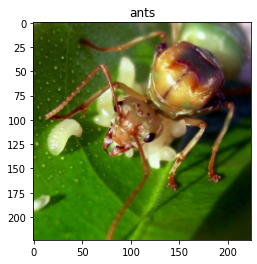

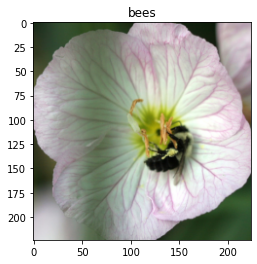

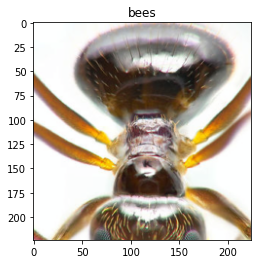

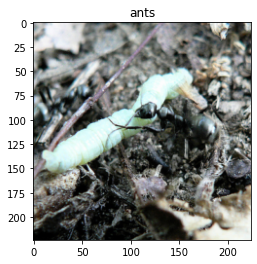

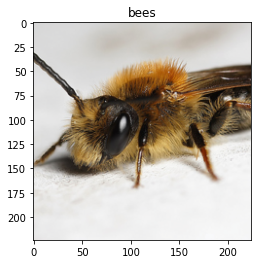

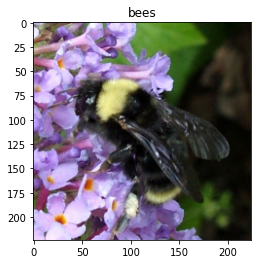

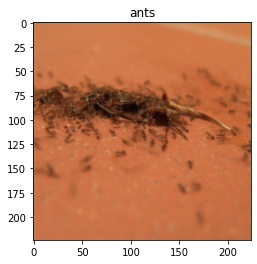

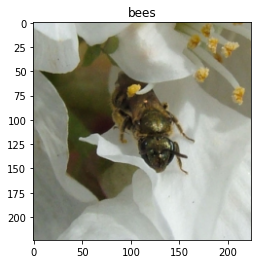

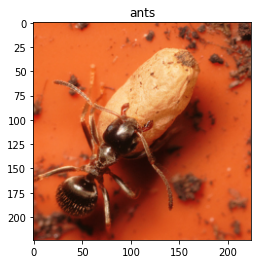

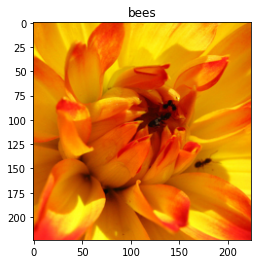

In [ ]:
# TODO: напишите функцию, прогоняющую модель на нескольких примерах из валидационной выборки
# Отобразите картинки и предсказания
def visualize(model, num_images=10):
  class_names = np.array(['ants', 'bees'])
  model.eval()
  dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=num_images,
                                             shuffle=True, num_workers=10)
                  for x in ['val']}
  inputs, labels = next(iter(dataloaders['val']))
  inputs = inputs.cuda()
  labels = labels.cuda()
  with torch.set_grad_enabled(False):
    preds = model_ft(inputs)
  test_predictions = class_names[preds.cpu().numpy().argmax(-1)]

  for img, pred in zip(inputs, test_predictions):
      show_input(img, title=pred)
            
visualize(model_ft)